
# Project: Investigate the TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
The Movie Database (TMDb) is a collaborative database that was founded in 2008 and it collects data about movies and TV series. It is a competing project to the commercial Internet Movie Database and can be used, for example, by the Kodi media center software. The entire TMDb contains information about more than 234,000 movies (Source: de.wikipedia.org)

The dataset that I will be using is curated by Udacity and contains only information about close to 11,000 movies. The dataset contains amongst others data about titles, taglines, keywords, short overviews, directors, cast, budgets, revenues, runtimes, genres, release date/year, popularity and vote counts and averages.

In my analysis, I would like to look at temporal developments that can be read from the data. I would like to look at the development of the number of films and series produced annually and how characteristics such as budgets spent and running times have developed. I would also like to see how the proportion of the most successful genres has changed over the period.

I would also like to see if there are any dependencies, for example if a higher budget has a positive effect on higher sales. In my analysis I will not use all of the data contained in the dataset.

Before I start the data wrangling process I will import the modules that I need for the analysis, apply the magic function for matplotlib to display diagrams inline and choose a Seaborn style.

In [1]:
# import statements for pandas, NumPy, matplotlib and Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First in the data wrangling process I will load the dataset into a pandas dataframe. I will then have a look at the first rows of the dataframe.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Next I am going to check the size of the dataset by using the method .shape

In [3]:
df.shape

(10866, 21)

This shows me that the dataframe has 10,866 rows and 21 columns.
Next I am going to see what datatypes the set uses. Maybe this tells me if I have to convert some columns to other types.

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The datatypes look pretty appropriate for the data. Only the column with the release date consists of strings (object) and is not in datetime format. If I am going to use that column in my analysis I will have to fix that later.

Now am going to find out if some columns have missing data by using the .isnull() method.

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

So obviously several columns have missing data. As I am going to drop some of the columns that I will not need for my analysis I don't have to take care of all those missing values. The remaining missing values I will either drop oder fill with means.

Next will I will get an overview on the numerical data by using .describe().

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Here the data raises some questions. First at least 75 % of the movies have a popularity below 1, but the maximum value is bigger than 32. Is it a normal outlier or  some incorrectly entered data? Maybe a internet search can provide some information on how the popularity value is calculated.

The next problem is that several columns have zeros in it, even though they should not. At least 50 % of the movies have a budet of 0 $. The same applies for the revenue column. As this is highly unlikely these values might just be missing. And there are also some movies with a runtime of 0. 

The runtime column shows as a minimum a value of 0 and a maximum of 900. While it is possible that the maximum value is for a series, the minimum value seems to be missing data.

The column "release_year" seems to be alright, the minimum value is 1960, obviously there is no missing data here. 

First I will take a look at the popularity column to find out if there is a notable number of movies that has a higher popularity than 1 (the number is chosen arbitrarily).

In [7]:
# number of movies with popularity >1
df.query("popularity > 1")["popularity"].count()

1756

Obviously there is. So it might be interesting to find out how the popularity score is calculated and if a score of more than 30 is even possible. On the TMDb website I found a [discussion where somebody else already asked this question](https://www.themoviedb.org/talk/5141d424760ee34da71431b0). As it is theoretically possible that the popularity value is anything from 0 to infinity the values in the popularity column seems to be in order.

Next I will have a look at budget values. First I am going to find out how many movies exactly have a budget of 0.

In [88]:
#query to find out how many movies have a budget of 0
df.query("budget == 0")['budget'].count()

5696

This number of values is far too high to just drop them in data cleaning and I will have to make a plausibilty check if the values could really be 0 or if they might just be missing.

I wiil do a quick research on Wikipedia to find out if the first ten movies on a query for the movies with a budget of 0 did indeed had no budget.

In [23]:
df.query("budget == 0").head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


Wikipedia gives the following budgets for the first ten movies from the query:
* Mr. Holmes: USD 10 million
* Solace: no information
* Beyond the Reach: no information
* Mythica - The Darkspore: no information
* Me and Earl and the Dying Girl: USD 8 million
* Equals: no information
* Mythica: The Necromancer: no information
* Alvin and the Chipmunks - The Road Chip:  USD 90 million
* Frozen Fever: no information
* High-Rise: GBP 6.1 million (approximately USD 8 million)
 
Even though Wikipedia could only give information on a few of the movies concerning the budget, I assume that the zeros in the budget column are missing values. In the cleaning process I will fill them with means so that they do not distort the calculations of the values.

Next I will check on the revenues column.

In [24]:
#query to find out how many movies have a revenue of 0
df.query("revenue == 0")['revenue'].count()

6016

As with the budget column this number of values is far too high to just drop them. But maybe the problem is the same as well, missing data.

In [25]:
df.query("revenue == 0").head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


Wikipedia gives the following revenues for the first ten movies from the query:
* Wild Card: USD 6.7 million
* Survivor: USD 3.6 million
* Mythica - The Darkspore: no information
* Me and Earl and the Dying Girl: USD 9.1 million
* Mythica - The Necromancer: no information
* Vice: no information
* Frozen Fever: no information
* High-Rise: USD 4.1 million
* Spooks - The Greater Good: USD 5.3 million
* The Scorpion King - The Lost Throne: no information

On some movies there was no information available as they were direct-to-DVD-movies.

In the cleaning process I will replace the zeros in the revenue column with NaNs. The same goes for the column the adjusted values for the revenue.

Last I will check on the runtime values of 0.

In [89]:
#query to find out how many movies have a runtime of 0
df.query("runtime == 0")['runtime'].count()

31

Only 31 movies have a runtime of 0 minutes. As this number is relatively small I will be able to just drop them without loosing too much information.


Next I take a look at an overview of the histrograms for the numerical values.

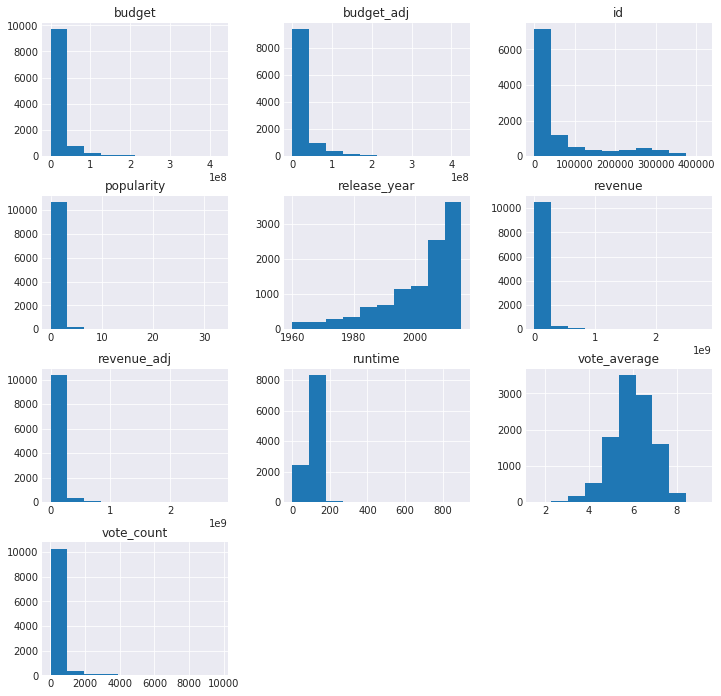

In [27]:
#get a histogram overview of all numerical data
df.hist(figsize=(12,12));

This largely shows what we have seen already. The columns for budget and revenues are heavily distorted by the many zeros they contain, so that the histograms are not very meaningful. Most movies have a low score for popularity and only very few have a higher score.

Interesting is that the number of movies made strongly increases over time.

Finally I check for duplicate rows.

In [3]:
# Checking for duplicate rows
sum(df.duplicated())

1

There is only one duplicate row in the dataset which I will delete in the cleaning process later.

### Data Cleaning

The first thing I do before I start the actual cleaning process (i.e. dropping lines with NaNs oder filling NaNs with values) is that I remove columns that I will not be using. I will be concentrating on the numerical data as I am interested in developments and trends over time. That means that I will be removing columns with specific data like the ID, the title, the tagline, cast, etc., the only non-numerical column I will keep is the genres columns.

Then I will drop duplicate rows and the rows which contain null values in the genres column. This should be no problem as there are only 23 rows with null values in the genres column, so that I will not be losing too much data.

As explained above I am going to replace the zeros in budget and revenue columns with the means of the respective columns as they are most likely missing values. Finally I will drop the lines where the runtime is 0.

In [14]:
# Checking for null values
df.isnull().sum()

popularity      0
budget          0
revenue         0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [3]:
# Dropping the columns for id, imdb_id, original_title, cast, homepage, director, tagline, keywords, overview, 
# production_companies, release_date
to_be_dropped = ['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date']
df.drop(to_be_dropped, axis=1, inplace=True)
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Dropping duplicate rows, rows with null values in genres column, checking the shape of the dateframe
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.shape

(10842, 10)

In [6]:
# Checking for null values
df.isnull().sum()

popularity      0
budget          0
revenue         0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

Now there are no null values in the dataframe left. Next I will solve the problem with the zero values in the budget and revenue columns by replacing them with means. In order to do this I will replace the zero values with null values first and then replace these with the mean. I am doing this so that all the zero values do not affect the calculation of the mean.

In [7]:
df.mean()

popularity      6.474606e-01
budget          1.465531e+07
revenue         3.991138e+07
runtime         1.021384e+02
vote_count      2.178236e+02
vote_average    5.974064e+00
release_year    2.001315e+03
budget_adj      1.758712e+07
revenue_adj     5.147797e+07
dtype: float64

In [5]:
# Replacing zero values in the budget and revenue columns with null values and checking on the changes
bud_rev = ['budget', 'budget_adj', 'revenue', 'revenue_adj']
for i in bud_rev:
    df[i] = df[i].replace(0, np.NaN)
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,5.168000e+03,4.849000e+03,10842.000000,10842.000000,10842.000000,10842.000000,5.168000e+03,4.849000e+03
mean,0.647461,3.074552e+07,8.923886e+07,102.138443,217.823649,5.974064,2001.314794,3.689620e+07,1.151009e+08
std,1.001032,3.890583e+07,1.620801e+08,31.294612,576.180993,0.934257,12.813617,4.196188e+07,1.988557e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.208210,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.384532,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.395666e+07
75%,0.715393,4.000000e+07,9.996575e+07,111.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Replacing the nulls values with the mean
df.fillna(df.mean(), inplace=True)
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,3.074552e+07,8.923886e+07,102.138443,217.823649,5.974064,2001.314794,3.689620e+07,1.151009e+08
std,1.001032,2.685958e+07,1.083868e+08,31.294612,576.180993,0.934257,12.813617,2.896940e+07,1.329795e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.208210,1.900000e+07,4.091286e+07,90.000000,17.000000,5.400000,1995.000000,2.445229e+07,5.840647e+07
50%,0.384532,3.074552e+07,8.923886e+07,99.000000,38.000000,6.000000,2006.000000,3.689620e+07,1.151009e+08
75%,0.715393,3.074552e+07,8.923886e+07,111.000000,146.000000,6.600000,2011.000000,3.689620e+07,1.151009e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Dropping lines where runtime is 0
df = df.query('runtime != 0')
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10812.000000,1.081200e+04,1.081200e+04,10812.000000,10812.000000,10812.000000,10812.000000,1.081200e+04,1.081200e+04
mean,0.648730,3.075301e+07,8.923886e+07,102.421846,218.369404,5.975379,2001.288938,3.690528e+07,1.151009e+08
std,1.001976,2.689305e+07,1.085371e+08,30.871363,576.886018,0.934122,12.819746,2.900442e+07,1.331639e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.209045,1.900000e+07,4.056961e+07,90.000000,17.000000,5.400000,1995.000000,2.432820e+07,5.796913e+07
50%,0.385298,3.074552e+07,8.923886e+07,99.000000,38.000000,6.000000,2006.000000,3.689620e+07,1.151009e+08
75%,0.716608,3.074552e+07,8.923886e+07,112.000000,146.000000,6.600000,2011.000000,3.689620e+07,1.151009e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The shortest runtime is now 2 minutes, which seems very short for a movie. But without further research I can not rule out that there is a short film of this length.

I am going to do a analysis of the genres. Therefore I will split up the contents of the genres column into new rows, i.e. one row for each genre. That means if a movie is assigned to three genres there will be three rows afterwards for this movie. Since this would change the weighting of the individual movies, I create the splitting in a new dataframe.

I found the coding solution for this task in the Udacity student hub: https://knowledge.udacity.com/questions/17467

In [8]:
# Creating a new dataframe with split up genres column
df_genres = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1,
drop=True).rename('genres'))

In [9]:
df_genres.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000.0,1.513529e+09,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000.0,1.513529e+09,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000.0,1.513529e+09,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000.0,1.513529e+09,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000.0,3.784364e+08,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


<a id='eda'></a>
## Exploratory Data Analysis

Now that I have cleaned the data I first want to look at some overall metrics of the dataframe before I try to answer some questions.

I want to take a quick look at the following things to maybe find out something interesting about the data:
* Shape
* Description
* Histograms of all numerical data
* Matrix of scatter plots

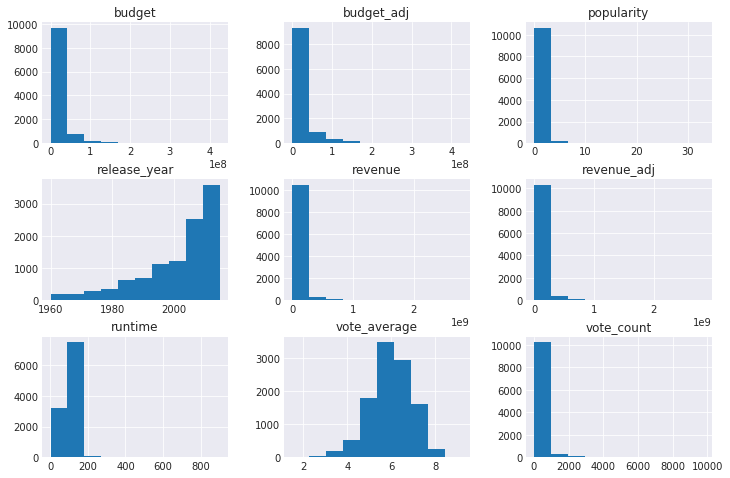

In [12]:
# Histogram of numerical data
df.hist(figsize=(12,8));

To get an overview of possible correlations between the data series, I create a scatter matrix.

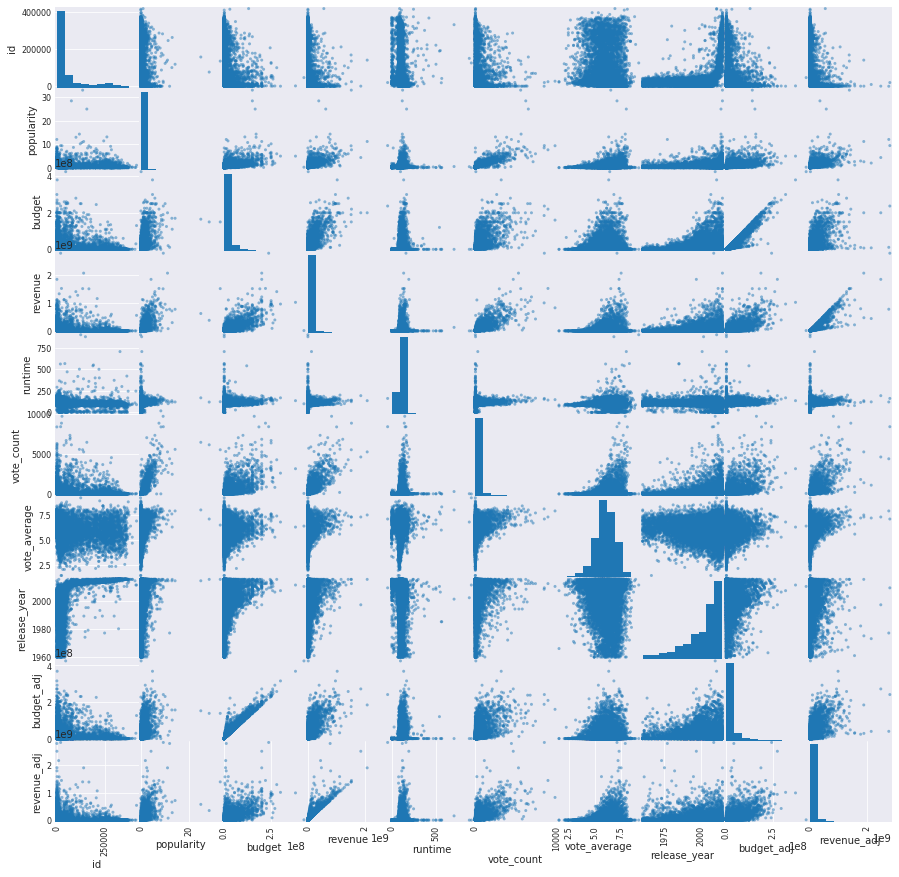

In [3]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

There are a few weaker correlations. An obvious correlation is certainly the one between popularity and vote count, maybe since popular movies are probably voted for more often. Another one is between budget and revenue. It seems that the more you spent on the production of a movie, the higher the revenue is.

I will discuss correlations between budget and other data series below.

### What are long term trends in the movie business?
In the first part of my analysis, I will examine the question of how the films and series produced during the period from 1960 to 2015 have changed on average.
I look at the development of the following characteristics over the period under study:
* Number of films and series produced per year
* Amount of budget per film
* Average running time per film
* Average cost per minute of film produced.

#### How has the number of films and series developed over the past 50 years?
The first thing that interests me is how the number of films and series produced changed between 1960 and 2015. 
For this purpose, I created a column chart with matplotlib, on which the number of films is plotted for each year in a column.

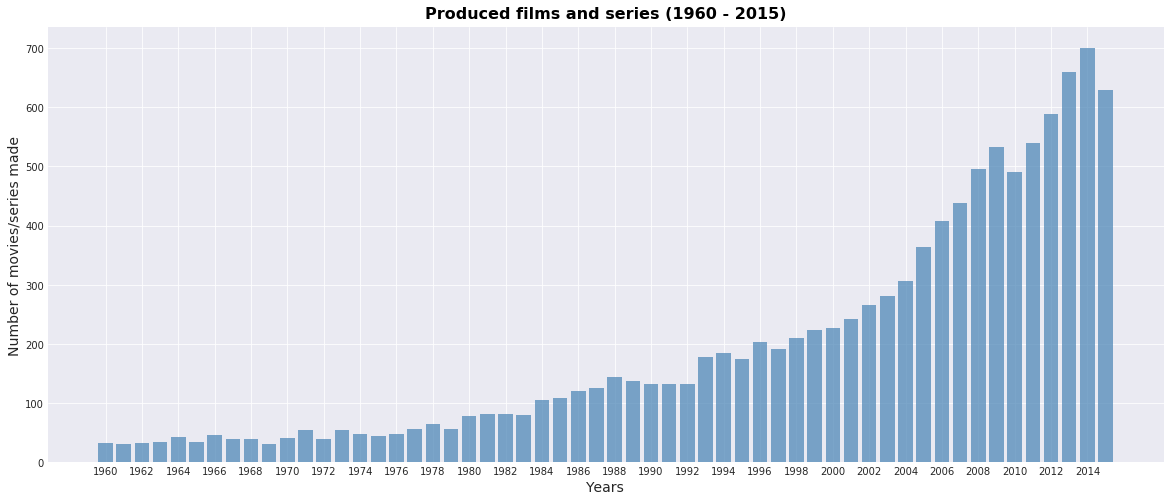

In [5]:
#Defining fonts
title_font = {'size':'16', 'color':'black', 'weight':'bold', 'verticalalignment':'bottom'} 
axis_font = {'size':'14'}

# Filtering the data for the labels of the x-axis and for the number of movies/series
ind = df.groupby('release_year').count()['popularity'].index
movies = df.groupby('release_year').count()['popularity']

# Creating the plot
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(ind, movies, alpha=0.7, color='steelblue')

# Adding title and labels 
plt.title('Produced films and series (1960 - 2015)', **title_font)
plt.xlabel('Years', **axis_font)
plt.ylabel('Number of movies/series made', **axis_font)
plt.xticks(np.arange(min(ind), max(ind)+1, 2.0))

plt.show();

In the first 15 years, the number of films increased only very slightly, albeit with fluctuations. After that, however, it increased strongly. The curve in the diagram indicates an almost exponential increase.
In 2010, however, there was a moderate slump in the number of films produced, perhaps as a delayed consequence of the financial crisis of 2008/2009 or the strike of the writers Guild of America in 2007/2008. Perhaps both factors play a role. 

#### How have budgets of films and series changed over the past 50 years?
Next I would like to see if and how budgets have changed over the years. Therefore I use matplotlib to plot a bar chart with a bar for each year that indicates the mean budget for the corresponding year. I use the adjusted data to ensure comparability.

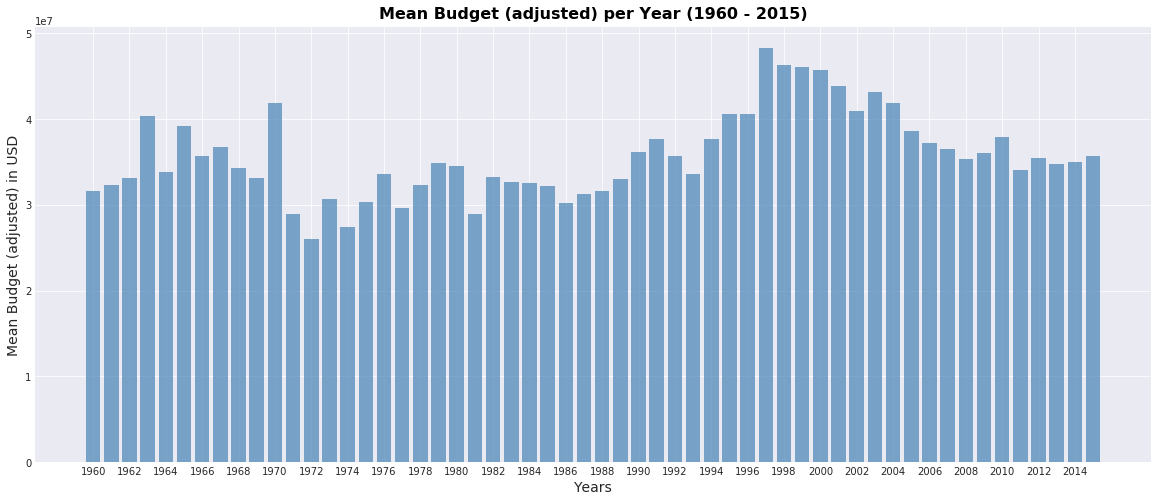

In [14]:
#Defining fonts
title_font = {'size':'16', 'color':'black', 'weight':'bold', 'verticalalignment':'bottom'} 
axis_font = {'size':'14'}

# Filtering the data for the labels of the x-axis and for the budget per year
ind = df.groupby('release_year').count()['popularity'].index
budget_per_year = df.groupby(['release_year'])['budget_adj'].mean()

# Creating the plot
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(ind, budget_per_year, alpha=0.7, color='steelblue')

# Adding title and labels 
plt.title('Mean Budget (adjusted) per Year (1960 - 2015)', **title_font)
plt.xlabel('Years', **axis_font)
plt.ylabel('Mean Budget (adjusted) in USD', **axis_font)
plt.xticks(np.arange(min(ind), max(ind)+1, 2.0))

plt.show();

As can be seen, the level of budgets varies over time, but it is not the case that budgets have increased continuously over time. The average budgets of the last ten years are about the same as the first ten years. The highest budgets can be observed in the ten years around the turn of the millennium.

#### How have runtimes of films and series changed over the past 50 years?
Through film series like "Lord of the Rings", "The Hobbit", the Avengers series or the Harry Potter films one can get the impression that the running times of films have become longer and longer in the last 20 years. To check this, I visualize the average runtimes for the period under review. 

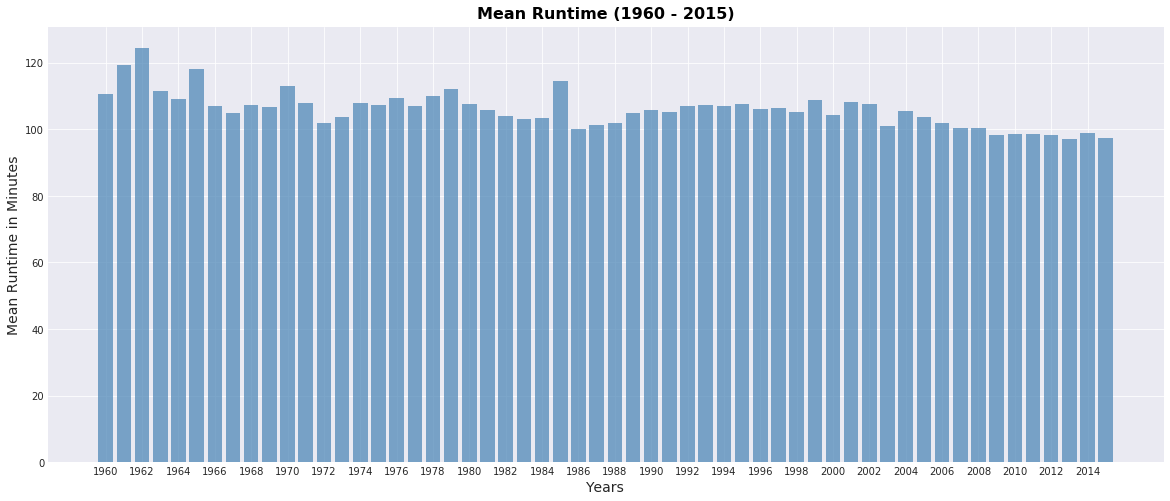

In [15]:
#Defining fonts
title_font = {'size':'16', 'color':'black', 'weight':'bold', 'verticalalignment':'bottom'} 
axis_font = {'size':'14'}

# Filtering the data for the labels of the x-axis and for the runtime per year
ind = df.groupby('release_year').count()['popularity'].index
mean_runtime_per_year = df.groupby(['release_year'])['runtime'].mean()

# Creating the plot
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(ind, mean_runtime_per_year, alpha=0.7, color='steelblue')

# Adding title and labels 
plt.title('Mean Runtime (1960 - 2015)', **title_font)
plt.xlabel('Years', **axis_font)
plt.ylabel('Mean Runtime in Minutes', **axis_font)
plt.xticks(np.arange(min(ind), max(ind)+1, 2.0))

plt.show();

Interestingly though, despite the examples I mentioned, the average film length has decreased since the 1960s with slight fluctuations. Since 2008 the average length is even less than 100 minutes.

#### How has the cost of one minute of produced film/series changed since 1960?
After we have seen that the adjusted budgets for films have varied, but not generally increased, while the length of the movies have slightly decreaesd, so the cost per minute of produced film should have slightly increased. I also want to visualize that.

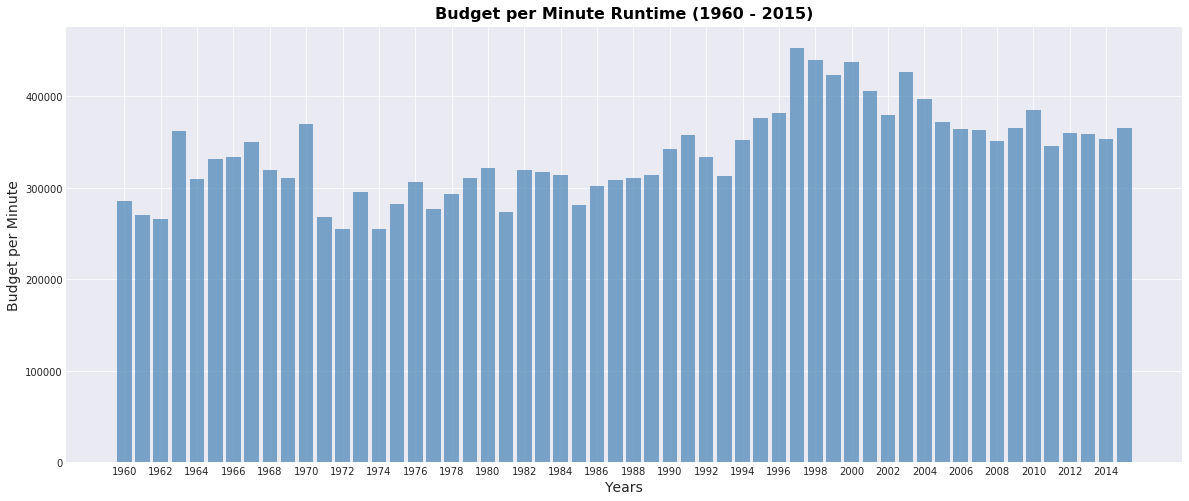

In [12]:
#Defining fonts
title_font = {'size':'16', 'color':'black', 'weight':'bold', 'verticalalignment':'bottom'} 
axis_font = {'size':'14'}

# Filtering/calculating the data for the labels of the x-axis and for the budget per minute runtime
ind = df.groupby('release_year').count()['popularity'].index
budget_per_minute = df.groupby(['release_year'])['budget_adj'].mean()/df.groupby(['release_year'])['runtime'].mean()

# Creating the plot
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(ind, budget_per_minute, alpha=0.7, color='steelblue')

# Adding title and labels 
plt.title('Budget per Minute Runtime (1960 - 2015)', **title_font)
plt.xlabel('Years', **axis_font)
plt.ylabel('Budget per Minute', **axis_font)
plt.xticks(np.arange(min(ind), max(ind)+1, 2.0))

plt.show();

And indeed the diagram resembles the visualization of development of budgets, but with higher bars for the last years. Until the mid 80's it took a budget of around 300,000 USD to produce one minute of a movie. Since 1997 these budgets rose to more than 350,000 USD.

#### How has the share of the top 5 movie genres changed?
Next, I would like to take a look at how the share of the five most produced genres has changed between 1960 and 2015. An analysis of all genres would certainly be interesting, but I suspect that a graphical representation would be too confusing. I will therefore limit the visualization to the five most common genres.

In [32]:
# Total number of genres
df_genres.nunique()['genres']

20

A series plot with 20 lines would not deliver much insight, also assummed, that the shares would nicht differ that much. So I think it is a good decision to stick with top 5 genres.

Next I have to find these 5 genres.

In [28]:
# Finding the top 5 movie genres
df_genres.groupby(['genres']).count()['popularity'].sort_values(ascending=False)[:5]

genres
Drama       4751
Comedy      3782
Thriller    2905
Action      2382
Romance     1705
Name: popularity, dtype: int64

So the top 5 genres are:
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance

As it would be very insightful to work with total numbers, I have to calculate the proportions. Therefore I will first have to find the number of films for each year.

In [49]:
#Calculating the total number of movies for each year
movies_per_year = df_genres.groupby(['release_year']).count()['popularity']

Next I will calculate the shares for all year for each of the top 5 genres.

In [35]:
#Calculating the share of drama movies for each year
df_drama = df_genres.query('genres == "Drama"').groupby('release_year').count()['popularity']
df_drama_share = df_drama/movies_per_year * 100

#Calculating the share of comedy movies for each year
df_comedy = df_genres.query('genres == "Comedy"').groupby('release_year').count()['popularity']
df_comedy_share = df_comedy/movies_per_year * 100

#Calculating the share of thriller movies for each year
df_thriller = df_genres.query('genres == "Thriller"').groupby('release_year').count()['popularity']
df_thriller_share = df_thriller/movies_per_year * 100

#Calculating the share of action movies for each year
df_action = df_genres.query('genres == "Action"').groupby('release_year').count()['popularity']
df_action_share = df_action/movies_per_year * 100

#Calculating the share of romantic movies for each year
df_romance = df_genres.query('genres == "Romance"').groupby('release_year').count()['popularity']
df_romance_share = df_romance/movies_per_year * 100

Now I can create the visualization using matplotlib. 

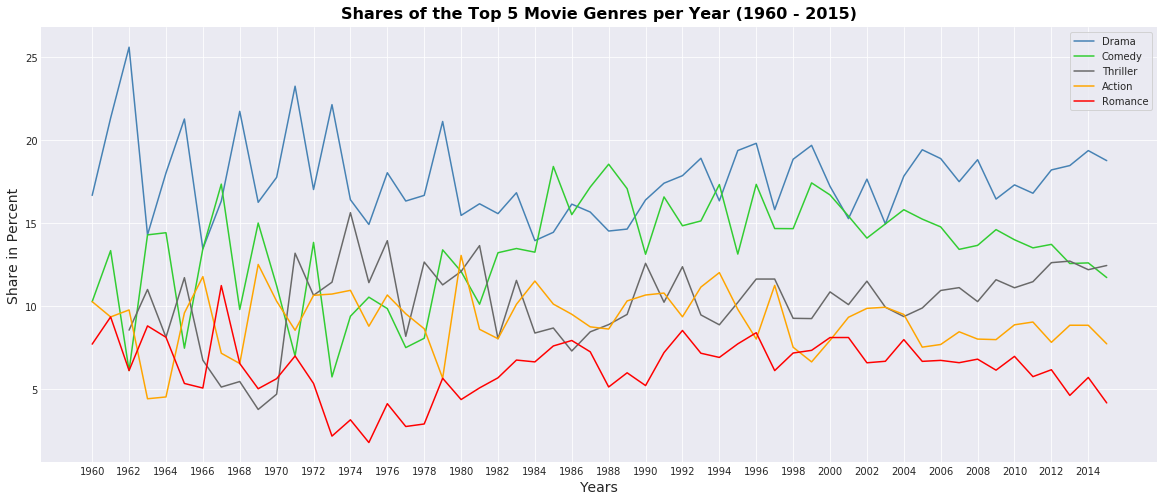

In [52]:
#Defining fonts
title_font = {'size':'16', 'color':'black', 'weight':'bold', 'verticalalignment':'bottom'} 
axis_font = {'size':'14'}

# Creating the plot
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(ind, df_drama_share ,color='steelblue', label='Drama')
plt.plot(ind, df_comedy_share, color='limegreen', label='Comedy')
plt.plot(ind, df_thriller_share, color='dimgrey', label='Thriller')
plt.plot(ind, df_action_share, color='orange', label='Action')
plt.plot(ind, df_romance_share, color='red', label='Romance')

# Adding title, labels, legend 
plt.title('Shares of the Top 5 Movie Genres per Year (1960 - 2015)', **title_font)
plt.xlabel('Years', **axis_font)
plt.ylabel('Share in Percent', **axis_font)
plt.legend(loc='upper right', frameon=True)
plt.xticks(np.arange(min(ind), max(ind)+1, 2.0))

plt.show();

That's an interesting result. While the proportions of the 5 most common genres fluctuated strongly in the first three decades, they have become much more stable, especially in the last 15 years.
I find particularly interesting the opposite movement in the genres drama and comedy in the first 15 years of the data. If many drama films were produced, there were fewer comedies at the same time. If their share increased again, the share of dramas fell at the same time. Maybe the audience demanded funny movies again, if they had been offered a lot of sad or oppressive movies before. And perhaps, after a series of light entertainment, they felt more like more profound subjects again.
But only once in this period the share of comedies was higher than the share of dramas.

### Correlations
In the last part of my analysis I would like to take a look at correlations in the dataset. It must of course be noted that correlations do not represent causal relationships. But they could give hints.

#### Does the turnover increase with the higher budget of a film?
In the scatter matrix above I could not find very clear correlations. I was hoping to find a clear correlation between the budget and the revenue, so as if a higher investment could lead to a higher turnover. But the data points are widely scattered (see diagram below).

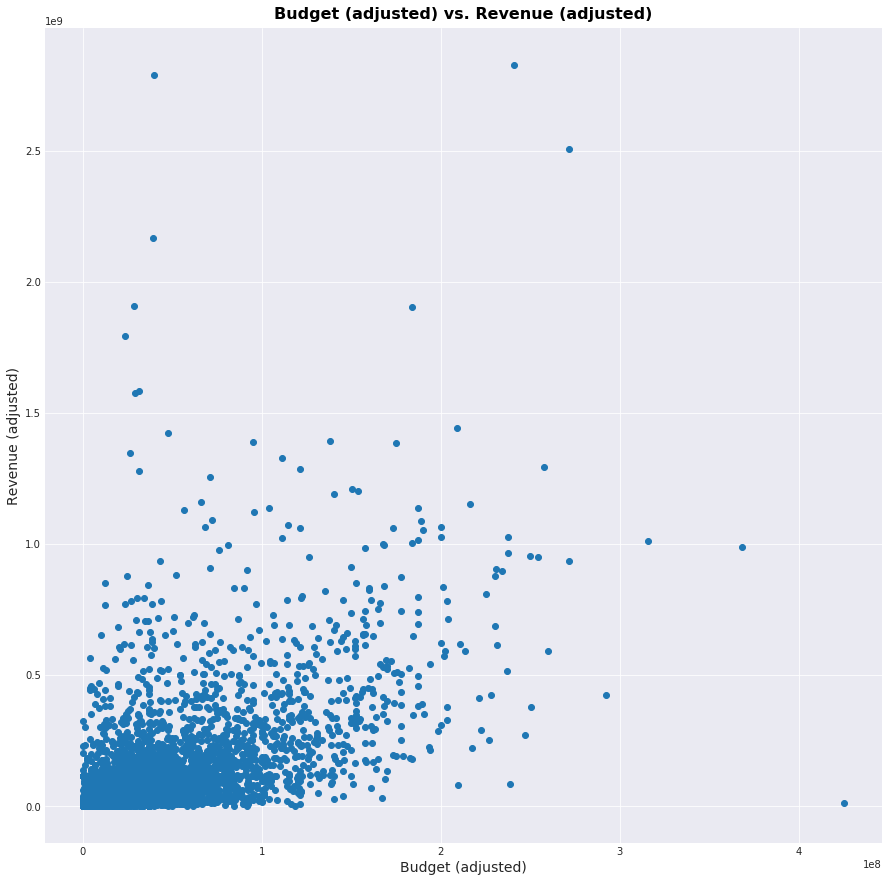

In [12]:
#Defining fonts
title_font = {'size':'16', 'color':'black', 'weight':'bold', 'verticalalignment':'bottom'} 
axis_font = {'size':'14'}

# Creating the plot
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(df.budget_adj, df.revenue_adj)

# Adding title, labels, legend 
plt.title('Budget (adjusted) vs. Revenue (adjusted)', **title_font)
plt.xlabel('Budget (adjusted)', **axis_font)
plt.ylabel('Revenue (adjusted)', **axis_font)

plt.show();

#### Vote count and vote average
Finally, I would like to look at how the value for vote average and vote count correlate. For this I create a corresponding scatter diagram with matplotlib.

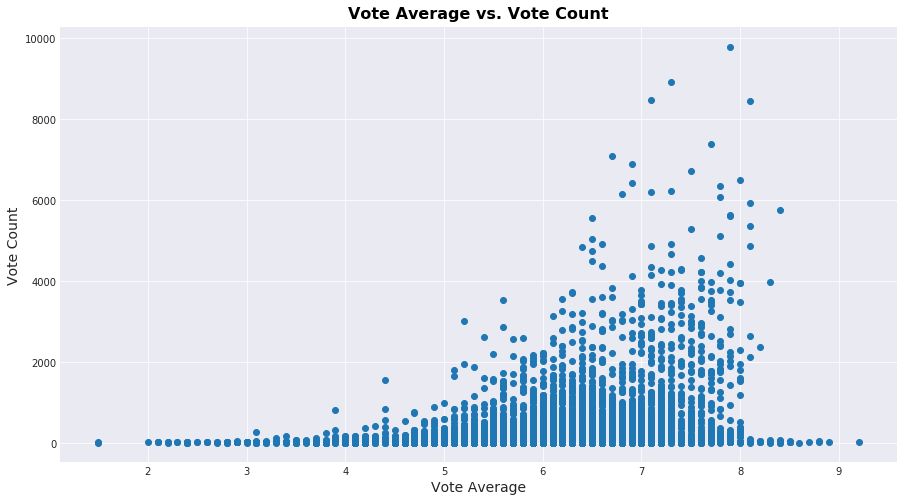

In [60]:
#Defining fonts
title_font = {'size':'16', 'color':'black', 'weight':'bold','verticalalignment':'bottom'} 
axis_font = {'size':'14'}

# Creating the plot
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(df.vote_average, df.vote_count)

# Adding title, labels, legend 
plt.title('Vote Average vs. Vote Count', **title_font)
plt.xlabel('Vote Average', **axis_font)
plt.ylabel('Vote Count', **axis_font)

plt.show();s

The plot shows that the higher the vote average is, the higher is the vote count. But only up to a certain vote average. The best rated movies/series have only a very small votre count. The first part ob the observation could be explained by the circumstance, that movies that are reviewed as good are watched by more people and that therefore more people might be inclined to express their favor. The low vote count at the end of the scale could therefore be due to the possibility that only very few people award high scores.

<a id='conclusions'></a>
## Conclusions

The analysis has brought some expected results, but also some surprising ones. It was to be expected that the number of films and series produced increased considerably during the period under study. On the other hand, it was astonishing that the adjusted average budgets did not increase so much and have even fallen in recent years. Also unexpected for me was the fact that the average running times of the films have decreased over time. When comparing the shares of the top 5 genres, the contrary development of dramas and comedies in the first few years is particularly interesting.

Of course the results have many limitations. As I wrote in the introduction, the TMDb contains information on more than 234,000 movies, while the Udacity dataset contains only about 11,000 movies and series. So the representativeness is questionable.

The data was also incomplete or could contain erroneous data: 
* Many zero values for the budget were replaced by mean values. 
* Even after removing the zero values in the runtime, there were still values that were so low that they didn't necessarily seem plausible. And one runtime was 900 minutes, which is an outlier that might distort the results.
* I assumed that the units for budgets and revenues were US dollar as no currencies were specified. But it could be that not all values were in USD.
* A lot of movies are attributed to more than one genre. So in the analysis of the share of the top 5 genres a lot of movies are counted more than once - a movie attributed with three genres is counted twice.

For the correlations it is important to stress that correlation is not causation, so there is not necessarily a causal connection between the values.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0